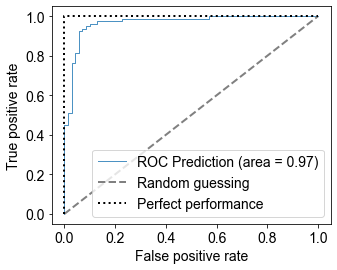

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size


# Generating synthetic dataset
X, y = make_classification(n_samples=300, n_features=20, random_state=42)

# Initialize the KFold object
cv = KFold(n_splits=2)

# Initialize variables to store the ROC curve information
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Plotting the ROC curves
plt.figure(figsize=(5, 4))

for i, (train, test) in enumerate(cv.split(X, y)):
    if i ==0:
        model = LogisticRegression()
        model.fit(X[train], y[train])
        y_prob = model.predict_proba(X[test])[:, 1]
        
        fpr, tpr, _ = roc_curve(y[test], y_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        
        plt.plot(fpr, tpr, lw=1, alpha=0.8, label=f'ROC Prediction (area = {roc_auc:.2f})')

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', label='Random guessing')

# Plot the perfect performance line
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', lw=2, color='black', label='Perfect performance')

# Plot the mean ROC curve
# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', 
#          label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)

# Setting plot labels and legend
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

# Save and display the plot
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\auc_eg.png", dpi=1000)

plt.show()
